In [93]:
from PIL import Image
import numpy as np
from random import randrange

Zadanie pierwsze:

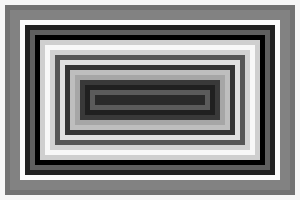

In [94]:
def rysuj_ramki_szare(w, h, grub):
    tab = np.ones((h,w), dtype=np.uint8)
    ile = min(h,w) // (grub * 2)
    for i in range(0, ile):
        kolor_ramki = randrange(0, 256)
        top = i * grub
        bottom = h - top
        left = i * grub
        right = w - left
        tab[top:top + grub, left:right] = kolor_ramki
        tab[bottom - grub:bottom, left:right] = kolor_ramki
        tab[top:bottom, left:left + grub] = kolor_ramki
        tab[top:bottom, right - grub:right] = kolor_ramki
    return Image.fromarray(tab)

ramki = rysuj_ramki_szare(300, 200, 5)
ramki

![zdjęcie pierwsze](ramki_szare.png)
<br>

Powyżej moje rozwiązanie części zadania pierwszego o szarych ramkach.
Mój sposób rysowania ramek, to ciągle zbliżające się do środka paski z każdej strony, stąd zmienne left, right, top, bottom.
O ile muszą się zmniejszyć i gdzie muszą się przesunąć pobieram ze zmiennej ile, którą mam z przykładowego kodu otrzymanego na zajęciach. Kolor ramki jest losowy za każdym przejściem w pętli generuje się inna losowa liczba z zakresu od 0 do 255 przez co każda kolejna ramka ma inny odcień szarości.
Moje umieszczanie pasków polega na tym, że najpierw załóżmy na to zmienna top wyznacza pozycję pierwszego paska, w przypadku i = 0, to będzie tak, że top = 0 * 5, czyli top = 0. Następnie w pierwszej tab dzieje się następująca operacja: na wysokości od 0 do 0 + 5 = 5 rysowany jest pasek o wygenerowanej szarości. Analogiczna operacja dzieje się dla pozostałych pasków.

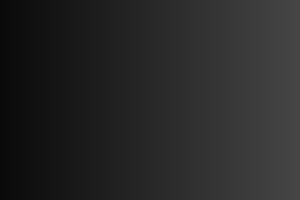

In [95]:
def rysuj_pasy_pionowe_szare(w, h, grub,zmiana):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(w / grub)
    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(h):
                tab[j, i] = (k + zmiana) % 256
    return Image.fromarray(tab)
pasy_szare_pion = rysuj_pasy_pionowe_szare(300,200,5, 10)
pasy_szare_pion

![pion_szare](pasy_pion_szare.png)
<br>

Powyżej rozwiązanie rysowania pionowych szarych pasów. Jest to zmodyfikowany kod otrzymany na zajęciach, tak żeby generował pasy pionowe zamiast poziomych. Zmienna ile wyznacza ile pasów ma powstać w zależności od szerokości obrazu, w tym wypadku będzie to 300/5=60. Zmienna i oblicza ile "pasków" pixeli ma zostać narysowane, żeby pokryć wpisaną w funkcji grubość. Kolejna pętla za to ustawia już wartości pixeli na ustalone kolory.

Zadanie drugie:

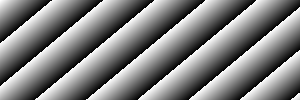

In [96]:
def rysuj_ramki_kolorowe(w, kolor, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = kolor[0]
    kolor_g = kolor[1]
    kolor_b = kolor[2]
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r) % 256
        kolor_g = (kolor_g - zmiana_koloru_g) % 256
        kolor_b = (kolor_b - zmiana_koloru_b) % 256
    return Image.fromarray(tab)

def rysuj_po_skosie_szare(h,w, a, b):
    t = (h, w)
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256
    return Image.fromarray(tab)


im_skos = rysuj_po_skosie_szare(100, 300, 6, 5)

def negatyw(obraz):
    tryb = obraz.mode
    tab = np.asarray(obraz)
    if tryb == '1':
        tab_neg = 1-tab.astype(np.uint8)
        return Image.fromarray(tab_neg * 255)
    elif tryb == 'L' or tryb == 'RGB':
        tab_neg = 255 - tab
        return Image.fromarray(tab_neg)

gwiazdka = Image.open("gwiazdka.bmp")

kolorowe = rysuj_ramki_kolorowe(200,[20,120,220],6, 5, -6)


negatyw(kolorowe)
negatyw(gwiazdka)
negatyw(im_skos)
#zakomentować pozostałe dwa jak chce się w jupyterze wyświetlic okreslony jeden

Kolorowe ramki przed wrzuceniem do funkcji negatyw:<br>
![kolorowe ramki](ramki_kolorowe.png)

Kolorowe ramki po wrzuceniu do funkcji negatyw:<br>
![kolorowe_ramki_negatyw](ramki_kolorowe_negatyw.png)

Gwiazdka przed wrzuceniem do funkcji negatyw:<br>
![gwiazdka_przed_negatywem](gwiazdka.bmp)

Gwiazdka po wrzuceniu do funkcji negatyw:<br>
![gwiazdka_po_negatywie](gwiazdka_negatyw.png)

Paski skośne przed negatywem:<br>
![skośne paski przed negatywem](im_skos.png)

Paski skośne po negatywie:<br>
![skośne paski po negatywie](im_skos_negatyw.png)

Funkcja negatyw sprawdza ifem tryb i na podstawie trybu odwraca w odpowiedni sposób kolory, jak jest tryb 1 odejmuje od 1 wartość każdej wartości w tablicy, a w L i RGB odejmuje od 255 wartości wszystkich wartości tablicy. Na końcu zwraca odwrócony obraz, w przypadku trybu 1 mnoży jeszcze razy 255, aby otrzymać odpowiednik w trybie uint8.

Funkcje rysuj_po_skosie_szare i rysuj_ramki_kolorowe zostały udostępnione na zajęciach.

rysuj_po_skosie_szare rysuje skośne linie zwiększając wartość w prawo w tablicy o 3 i o 1 w dół przez co powstaje szary "skośny" obraz za pomocą formuły z a i b.

rysuj_ramki_kolorowe działa w ten sposób, że pętla pierwsza iteruje przez kolejne ramki, zaczynając od zewnętrznej i kończąc na wewnętrznej. Pętla k reprezentuje numer ramki, a także odległość od krawędzi. Pętle i i j wypełniają piksele aktualnej ramki wartościami koloru RGB. Po narysowaniu ramki, wartości każdego koloru się zmniejszają odejmowaniem i są dalej zmieniane przy pomocy operacji % 256(aby zapobiec przekroczeniu wartości 255 dla koloru używamy modulo żeby zawinąć).

Zadanie trzecie:

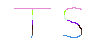

In [97]:
def koloruj_w_paski(obraz, grub, liczba_kolorow):
    t_obraz = np.asarray(obraz)
    h,w = t_obraz.shape
    tab = np.ones((h,w,3),dtype=np.uint8) * 255
    kolory = [[]] * liczba_kolorow
    for l in range(liczba_kolorow):
        kolory[l] = [randrange(0, 256), randrange(0, 256), randrange(0, 256)]
    for i in range(h):
        ile = len(kolory)
        kolor = kolory[(i//grub) % ile]
        for j in range(w):
            if t_obraz[i,j] == False:
                tab[i,j] = kolor
    return Image.fromarray(tab, mode='RGB')
obrazek = Image.open("inicjaly.bmp")
inicjaly_paski = koloruj_w_paski(obrazek, 5, 10)
inicjaly_paski


Inicjały przed kolorowaniem:<br>
![inicjały przed kolorowaniem](inicjaly.bmp)

Inicjały po kolorowaniu jako jpg:<br>
![inicjaly jako jpg](inicjaly_kolorowe.jpg)

Inicjały po kolorowaniu jako png:<br>
![inicjały_jako_png](inicjaly_kolorowe.png)

Powyższa funkcja koloruje tylko te części obrazu, które są czarne na oryginalnym obrazie(w trybie '1'). Moja wersja jest taka, że generuje za każdym razem wpisaną przez użytkownika ilość kolorów, które są losowo generowane w pierwszej pętli. Druga pętla najpierw wyznacza przez jaką grubość ma ona przechodzić za pomocą zmiennej kolor. np. kolor = kolory[(0//5) % 10], czyli pierwszy pasek będzie dzieki temu przez pierwsze pięc przejść pętli j kolorował tym samym kolorem dzięki modulo. W drugiej pętli sprawdzane jest też, czy kolor się zmieni ifem sprawdzającym czy dany pixel jest czarny.

Otrzymane obrazy nie są takie same, png nie stosuje kompresji stratnej zatem obrazy posiadają oryginalne kolory i się nie odbarwiają i ogółem nie tracą na jakości tak jak jpg. Png wspiera także kanał alfa przez co przezroczyste obrazy zostają przezroczyste jak zostają w nim zapisane.

Zadanie czwarte

Gdy wartość typu uint8 przekracza 255 lub jest ujemna zachodzi operacja modulo. Oznacza to, że wartości są "owijane" do zakresu 0-255, co w efekcie skutkuje:
* Dla wartości większych niż 255: Wartość modulo 256 zostanie przypisana.
* Dla wartości ujemnych: Modulo 256 zostanie obliczone z negatywnymi wartościami, co skutkuje wartością z zakresu 0-255.

Dla przykładów:
* Wartość 328: Przekracza ona 255. Aby uzyskać prawidłową wartość dla uint8, należy obliczyć 328 % 256, co daje 72. Zatem 328 jako uint8 zostanie zmapowane do wartości 72.
* Wartość -24: -24 jest liczbą ujemną. W uint8 obliczamy wartość przez dodanie wielokrotności 256 do momentu uzyskania liczby dodatniej. Wynik to: -24%256=256-24=232 Zatem -24 jako uint8 zostanie zmapowane do wartości 232.